<a href="https://colab.research.google.com/github/leethanhvaan20302/A.I.-Artificial-Intelligence/blob/main/BT5.%20Class_members%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***5. recognition of all members of class from face images (you collected)***

In [ ]:
# Import các thư viện cần thiết, bao gồm: Keras, numpy, matplotlib, và os.
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Di chuyển tới thư mục VNMoney
%cd /content/drive/MyDrive/Fl Colab/Class IMG

/content/drive/.shortcut-targets-by-id/1OZXL2zx0xsZbSA-ISvdht2SWobUWzPsf/Class IMG


In [ ]:
# Khởi tạo dữ liệu cho quá trình training và validation bằng cách sử dụng
"""Sử dụng lớp ImageDataGenerator để tiền xử lý dữ liệu ảnh. 
Hàm rescale=1./255 giúp chia giá trị của các pixel trong ảnh cho 255 để đưa giá trị về khoảng [0,1]. shear_range, zoom_range 
và horizontal_flip là các thuộc tính khác của lớp ImageDataGenerator giúp tăng tính đa dạng của dữ liệu.

Khởi tạo training data và validation data bằng phương thức flow_from_directory của lớp ImageDataGenerator. 
Tham số target_size là kích thước của ảnh sau khi được resize về cùng kích thước, 
batch_size là số lượng ảnh được truyền vào mô hình mỗi lần tính toán,
và class_mode='categorical' là chế độ phân loại đa lớp cho mô hình."""

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training = train_datagen.flow_from_directory('/content/drive/MyDrive/Fl Colab/Class IMG/train',target_size = (150,150), batch_size = 32,class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/Fl Colab/Class IMG/valid',target_size=(150,150), batch_size=32, class_mode='categorical')
 

Found 1117 images belonging to 24 classes.
Found 288 images belonging to 24 classes.


In [ ]:
# Kiểm tra các thuộc tính của tập dữ liệu training
training.class_indices
# Kiểm tra các thuộc tính của tập dữ liệu validation
validation.class_indices

{'Binh': 0,
 'Dang Khoa': 1,
 'Dung': 2,
 'HQHuy': 3,
 'Ha': 4,
 'Ha Kiet': 5,
 'Hau': 6,
 'Hieu': 7,
 'Hoai Phong': 8,
 'Hoang': 9,
 'HuuLong': 10,
 'Kiet': 11,
 'KyAnh': 12,
 'Loc': 13,
 'Luan': 14,
 'Phat': 15,
 'Phuc': 16,
 'Sang': 17,
 'Thai': 18,
 'Thang': 19,
 'Thanh': 20,
 'Thao': 21,
 'Thinh': 22,
 'Tien': 23}

In [ ]:
# Tạo ra mạng CNN để train mô hình
"""Tạo model CNN bằng cách sử dụng lớp Conv2D để thêm các layer convolution, lớp MaxPooling2D để giảm chiều của ảnh,
 lớp Flatten để chuyển đổi dữ liệu ảnh thành một vector 1D, lớp Dense để thêm các layer fully connected, và lớp Dropout để tránh overfitting."""
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch model bằng cách sử dụng hàm compile, với các tham số như: optimizer, loss, và metrics.
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()
# Tiến hành quá trình training model bằng cách sử dụng hàm fit.
train = model.fit(training,epochs = 20,validation_data=validation,verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:

# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.03184094280004501
Train Accuracy 0.9910474419593811


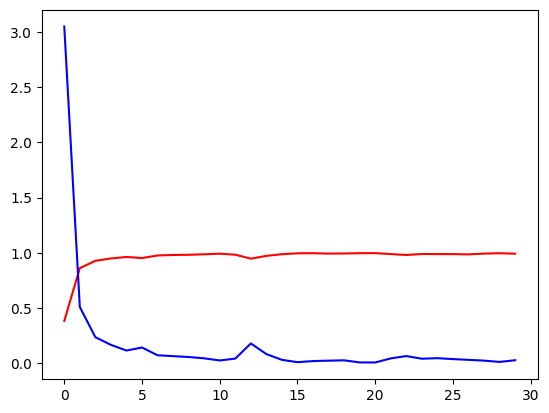

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot( epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot( epochs, loss, 'b', label = 'Training loss')
plt.show()
     

In [ ]:

# Lưu 
from google.colab import drive
model.save('/content/drive/MyDrive/Fl Colab/Save ModelS/IMG Class.h5')

In [ ]:
# Load model vừa lưu
from tensorflow.keras.models import load_model
model_1=load_model('/content/drive/MyDrive/Fl Colab/Save ModelS/IMG Class.h5')

1/1 [==============================] - 0s 356ms/step
Tiên


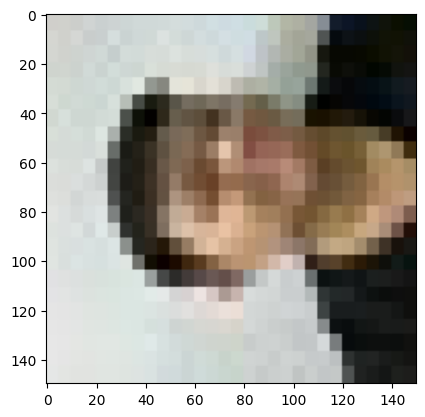

1/1 [==============================] - 0s 82ms/step
Thái


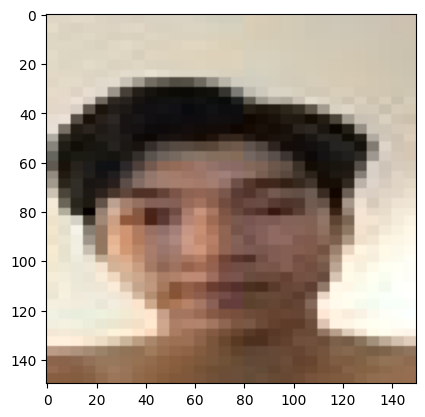

1/1 [==============================] - 0s 63ms/step
Hoàng


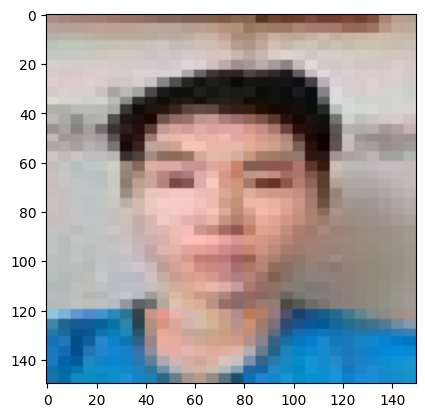

1/1 [==============================] - 0s 72ms/step
HQHuy


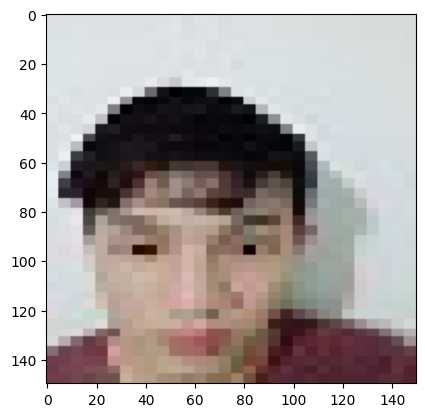

1/1 [==============================] - 0s 64ms/step
Dũng


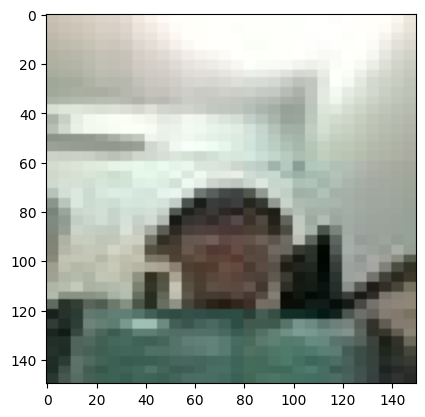

1/1 [==============================] - 0s 67ms/step
Bình


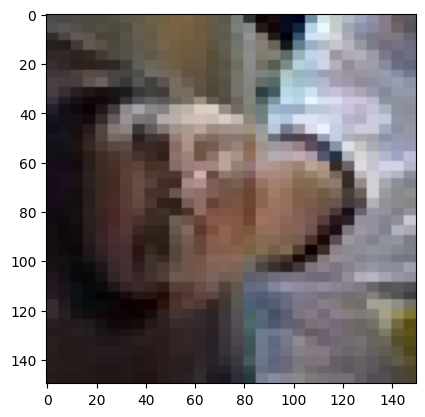

In [ ]:
# Chạy thử kết quả
"""Sử dụng model để dự đoán trên ảnh mới bằng cách sử dụng hàm predict và xác định class của ảnh bằng cách sử dụng hàm argmax."""

test="/content/drive/MyDrive/Fl Colab/Class IMG/test"

for i in listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bình',
 'Đăng Khoa', 'Dũng',
 'HQHuy', 'Hà', 'Ha Kiệt', 'Hậu', 'Hiếu', 'Hoài Phong', 'Hoàng',
 'HuuLong', 'Kiệt', 'KyAnh', 'Loc', 'Luân', 'Phát', 'Phúc', 'Sang', 'Thái','Thắng', 'Thanh', 'Thảo', 'Thịnh','Tiên']
  print(class_name[result])
  plt.show()